# Plots from merlin runs
## mlmc cost vs epsilon

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_mlmc_cost_vs_epsilon(csv_file, show=False, name=None):
    """
    Plot MLMC cost vs epsilon for each dimension from the extracted CSV data.

    Args:
        csv_file: Path to the CSV file containing MLMC data
    """

    # Read the CSV data
    df = pd.read_csv(csv_file)

    grouped = df.groupby(['dimension', 'epsilon']).agg({
        'mlmc_cost': ['mean', 'std', 'count'],
    }).reset_index()

    grouped.columns = ['dimension', 'epsilon', 'mlmc_cost_mean', 'mlmc_cost_std','mlmc_cost_count']
    # Get unique dimensions and sort them
    dimensions = sorted(df['dimension'].unique())

    # Create the plot
    plt.figure(figsize=(12, 8))

    # Color map for different dimensions
    colors = plt.cm.tab10(np.linspace(0, 1, len(dimensions)))

    for i, dim in enumerate(dimensions):

        # Plot MLMC cost vs epsilon
        dim_data = grouped[grouped['dimension'] == dim].copy()

        # Sort by epsilon for proper line plotting
        dim_data = dim_data.sort_values('epsilon')
        # Plot MLMC cost vs epsilon
        plt.errorbar(dim_data['epsilon'], dim_data['mlmc_cost_mean'], 
                    yerr=dim_data['mlmc_cost_std'], 
                    fmt='o-', color=colors[i], label=f'Dimension {dim}', 
                    linewidth=2, markersize=6, capsize=4, capthick=1)

    # Customize the plot
    plt.xlabel('Epsilon (ε)', fontsize=12)
    plt.ylabel('MLMC Cost', fontsize=12)
    plt.grid(True, alpha=0.3)
    # Add ideal convergence line
    plt.axline((0.0001, 1e9), (0.001, 1e7),
               color='black', linestyle='--', alpha=0.5,
               label='$\frac{1}{\sqrt{W}}$')
    plt.legend(fontsize='large')

    # Set log scale for both axes
    plt.xscale('log')
    plt.yscale('log')

    # Adjust layout to prevent legend cutoff
    plt.tight_layout()

    if show:
        plt.savefig(name)

    # Show the plot
    plt.show()

    # Print summary statistics
    print("\nSummary Statistics:")
    print("=" * 50)
    for dim in dimensions:
        dim_data = df[df['dimension'] == dim]
        print(f"Dimension {dim}:")
        print(f"  Epsilon range: {dim_data['epsilon'].min():.2e} - {dim_data['epsilon'].max():.2e}")
        print(f"  MLMC cost range: {dim_data['mlmc_cost'].min():.2e} - {dim_data['mlmc_cost'].max():.2e}")
        print(f"  Number of data points: {len(dim_data)}")
        print()


<>:50: SyntaxWarning: invalid escape sequence '\s'
<>:50: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1985/4201536066.py:50: SyntaxWarning: invalid escape sequence '\s'
  label='$\frac{1}{\sqrt{W}}$')


## mlmc vs dimension

In [2]:
def plot_mlmc_cost_vs_dimension(csv_file, show=False, name=None):
    """
    Plot MLMC cost vs epsilon for each dimension from the extracted CSV data.

    Args:
        csv_file: Path to the CSV file containing MLMC data
    """

    # Read the CSV data
    df = pd.read_csv(csv_file)

    grouped = df.groupby(['dimension', 'epsilon']).agg({
        'mlmc_cost': ['mean', 'std', 'count'],
    }).reset_index()

    grouped.columns = ['dimension', 'epsilon', 'mlmc_cost_mean', 'mlmc_cost_std','mlmc_cost_count']
    # Get unique dimensions and sort them
    epsilons = sorted(df['epsilon'].unique())

    # Create the plot
    plt.figure(figsize=(12, 8))

    # Color map for different dimensions
    colors = plt.cm.tab10(np.linspace(0, 1, len(epsilons)))

    for i, eps in enumerate(epsilons):

        # Plot MLMC cost vs epsilon
        eps_data = grouped[grouped['epsilon'] == eps].copy()

        # Sort by epsilon for proper line plotting
        eps_data = eps_data.sort_values('dimension')
        # Plot MLMC cost vs epsilon
        plt.errorbar(eps_data['dimension'], eps_data['mlmc_cost_mean'], 
                    yerr=eps_data['mlmc_cost_std'], 
                    fmt='o-', color=colors[i], label=f'Epsilon {eps}', 
                    linewidth=2, markersize=6, capsize=4, capthick=1)
        print(eps_data['mlmc_cost_mean'])
    
    

    # Customize the plot
    plt.xlabel('Dimension', fontsize=12)
    plt.ylabel('MLMC Cost', fontsize=12)
    plt.grid(True, alpha=0.3)
    # Add ideal convergence line
     
    plt.axline((2, 2*5.975354e+08),
               (3, 2*9.823585e+08), 
               color='black', 
               linestyle='--', alpha=0.5,
               label='exponential growth')
    plt.legend(fontsize='large')

    # Set log scale for both y-axis
    plt.yscale('log')

    # Adjust layout to prevent legend cutoff
    plt.tight_layout()

    if show:
        plt.savefig(name)

    # Show the plot
    plt.show()
 

## mlmc vs dt

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_mlmc_cost_vs_dt_ratio(combined_data, save=False, name=None):
    """
    Plot MLMC cost vs epsilon for each dimension from the extracted CSV data.

    Args:
        csv_file: Path to the CSV file containing MLMC data
    """
    df = combined_data[combined_data['epsilon'] == 2.5e-5].copy()

    # Group by dimension and epsilon, calculate statistics
    grouped = df.groupby(['dimension', 'dt_ratio']).agg({
        'mlmc_cost': ['mean', 'std', 'count'],
        'mc_cost': 'mean'
    }).reset_index()

    # Flatten column names
    grouped.columns = ['dimension', 'dt_ratio', 'mlmc_cost_mean', 'mlmc_cost_std', 'mlmc_cost_count', 'mc_cost_mean']

    # Get unique dimensions and sort them
    dimensions = sorted(grouped['dimension'].unique())

    # Create the plot
    plt.figure(figsize=(12, 8))

    # Color map for different dimensions
    colors = plt.cm.tab10(np.linspace(0, 1, len(dimensions)))


    for i, dim in enumerate(dimensions):
        # Filter data for current dimension
        dim_data = grouped[grouped['dimension'] == dim].copy()

        # Sort by epsilon for proper line plotting
        dim_data = dim_data.sort_values('dt_ratio')
        # Plot MLMC cost vs epsilon
        plt.errorbar(dim_data['dt_ratio'], dim_data['mlmc_cost_mean'], 
                    yerr=dim_data['mlmc_cost_std'], 
                    fmt='o-', color=colors[i], label=f'Dimension {dim}', 
                    linewidth=2, markersize=6, capsize=4, capthick=1)

    # Customize the plot
    plt.xlabel('Ratio between levels', fontsize=12)
    plt.ylabel('MLMC Cost', fontsize=12)
    plt.title('MLMC Cost vs ratio between levels by Dimension', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Set log scale for both axes
    plt.xscale('log',base=2)
    plt.yscale('log')

    # Adjust layout to prevent legend cutoff
    plt.tight_layout()
    
    if save:
        plt.savefig(name)
    # Show the plot
    plt.show()

    # Print summary statistics
    print("\nSummary Statistics:")
    print("=" * 50)
    for dim in dimensions:
        dim_data = df[df['dimension'] == dim]
        print(f"Dimension {dim}:")
        print(f"  dt ratio range: {dim_data['dt_ratio'].min():.2e} - {dim_data['dt_ratio'].max():.2e}")
        print(f"  MLMC cost range: {dim_data['mlmc_cost'].min():.2e} - {dim_data['mlmc_cost'].max():.2e}")
        print(f"  Number of data points: {len(dim_data)}")
        print()

## speedup

In [18]:
def plot_speedup(csv_file, dim, save=False, name=None):
    """
    Plot average speedup (MC cost / MLMC cost) vs epsilon for each dimension,
    grouping data points with the same dimension and epsilon.

    Args:
        csv_file: Path to the CSV file containing MLMC data
    """

    df = pd.read_csv(csv_file)

    # Calculate speedup ratio
    df['speedup'] = df['mc_cost'] / df['mlmc_cost']

    # Group by dimension and epsilon, calculate statistics
    grouped = df.groupby(['dimension', 'epsilon']).agg({
        'speedup': ['mean', 'std', 'count'],
        'mc_cost': 'mean',
        'mlmc_cost': 'mean'
    }).reset_index()

    # Flatten column names
    grouped.columns = ['dimension', 'epsilon', 'speedup_mean', 'speedup_std', 'speedup_count', 'mc_cost_mean', 'mlmc_cost_mean']

    # Get unique dimensions and sort them
    dimensions = sorted(grouped['dimension'].unique())

    # Create the plot
    plt.figure(figsize=(12, 8))

    # Color map for different dimensions
    colors = plt.cm.tab10(np.linspace(0, 1, len(dimensions)))

    # Filter data for current dimension
    dim_data = grouped[grouped['dimension'] == dim].copy()

    # Sort by epsilon for proper line plotting
    dim_data = dim_data.sort_values('epsilon')
    
    # Plot average speedup vs epsilon with error bars
    plt.errorbar(dim_data['epsilon'], dim_data['speedup_mean'], 
                yerr=dim_data['speedup_std'], 
                fmt='o-', color=colors[dim-2], label=f'Dimension {dim}', 
                linewidth=2, markersize=6, capsize=4, capthick=1)

    #add expected speedup
    a, b = np.polyfit(np.log(dim_data['epsilon']), dim_data['speedup_mean'], 1)
    x = np.logspace(-3, -5, num=10, base=10)  
    y = a*np.log(x) + b
    plt.plot(x, y, color='black', linestyle=':', alpha=0.5, label='expected speedup')

    # Add horizontal line at speedup = 1 (no speedup)
    plt.axhline(y=1, color='black', linestyle='--', alpha=0.5, label='No speedup')
    
    # Customize the plot
    plt.xlabel('Epsilon (ε)', fontsize=12)
    plt.ylabel('Average Speedup (MC Cost / MLMC Cost)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large')

    # Set log scale for x-axis only
    plt.xscale('log')

    ax = plt.gca()
    ymin = min(0.95, dim_data['speedup_mean'].min() - 0.05)
    ax.set_ylim([ymin, 4.0])
    # Adjust layout to prevent legend cutoff
    plt.tight_layout()

    if save:
        plt.savefig(name)
    # Show the plot
    plt.show()

    # Print grouped speedup statistics
    print("\nGrouped Speedup Statistics:")
    print("=" * 60)
    dim_data = grouped[grouped['dimension'] == dim]
    print(f"Dimension {dim}:")
    print(f"  Number of epsilon values: {len(dim_data)}")
    print(f"  Overall speedup range: {dim_data['speedup_mean'].min():.2f}x - {dim_data['speedup_mean'].max():.2f}x")
    print(f"  Overall average speedup: {dim_data['speedup_mean'].mean():.2f}x")
    print(f"  Data points per epsilon: {dim_data['speedup_count'].iloc[0]} (assuming uniform)")
    print()

#plot_speedup(csv_file, 2)

## Work per delta

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_work_vs_delta(csv_file, save=False, name=None):
    """
    Plot MLMC cost vs epsilon for each dimension from the extracted CSV data.

    Args:
        csv_file: Path to the CSV file containing MLMC data
    """
    df = pd.read_csv(csv_file)
    # Group by dimension and epsilon, calculate statistics
    grouped = df.groupby(['Dimension', 'delta']).agg({
        'work': ['mean', 'std', 'count'],
        'WoS-error': ['mean', 'std', 'count']
    }).reset_index()

    # Flatten column names
    grouped.columns = ['Dimension', 'delta',
                       'work_mean', 'work_std', 'work_count',
                       'WoS-error_mean', 'WoS-error_std', 'WoS-error_count']

    # Get unique dimensions and sort them
    dimensions = sorted(grouped['Dimension'].unique())

    # Create the plot
    plt.figure(figsize=(12, 8))

    # Color map for different dimensions
    colors = plt.cm.tab10(np.linspace(0, 1, len(dimensions)))


    for i, dim in enumerate(dimensions):
        # Filter data for current dimension
        dim_data = grouped[grouped['Dimension'] == dim].copy()

        # Sort by epsilon for proper line plotting
        dim_data = dim_data.sort_values('delta')
        dim_data['work_mean'] /= 1e6
        dim_data['work_std'] /= 1e6
        # Plot MLMC cost vs epsilon
        plt.errorbar(dim_data['delta'], dim_data['work_mean'], 
                    yerr=dim_data['work_std'], 
                    fmt='o-', color=colors[i], label=f'Dimension {dim}', 
                    linewidth=2, markersize=6, capsize=4, capthick=1)

    # Customize the plot
    plt.xlabel('$\delta$', fontsize=12)
    plt.ylabel('Cost per sample', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize='x-large')

    # Set log scale for both axes
    plt.xscale('log')
    #plt.yscale('log')

    # Adjust layout to prevent legend cutoff
    plt.tight_layout()
    
    if save:
        plt.savefig(name)
    # Show the plot
    plt.show()

<>:49: SyntaxWarning: invalid escape sequence '\d'
<>:49: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_33722/3121435997.py:49: SyntaxWarning: invalid escape sequence '\d'
  plt.xlabel('$\delta$', fontsize=12)


## combine csvs

In [5]:
def combine_ratios(ratio2_file, ratio4_file, ratio8_file, ratio16_file):
    combined_data = pd.read_csv(ratio2_file)
    combined_data['dt_ratio'] = 2

    tmp_data = pd.read_csv(ratio4_file)
    tmp_data['dt_ratio'] = 4
    combined_data = pd.concat([combined_data,tmp_data], ignore_index=True, sort=False)
    tmp_data = pd.read_csv(ratio8_file)
    tmp_data['dt_ratio'] = 8
    combined_data = pd.concat([combined_data,tmp_data], ignore_index=True, sort=False)
    tmp_data = pd.read_csv(ratio16_file)
    tmp_data['dt_ratio'] = 16
    combined_data = pd.concat([combined_data,tmp_data], ignore_index=True, sort=False)
    combined_data['speedup'] = combined_data['mc_cost']/combined_data['mlmc_cost']
    return combined_data
    

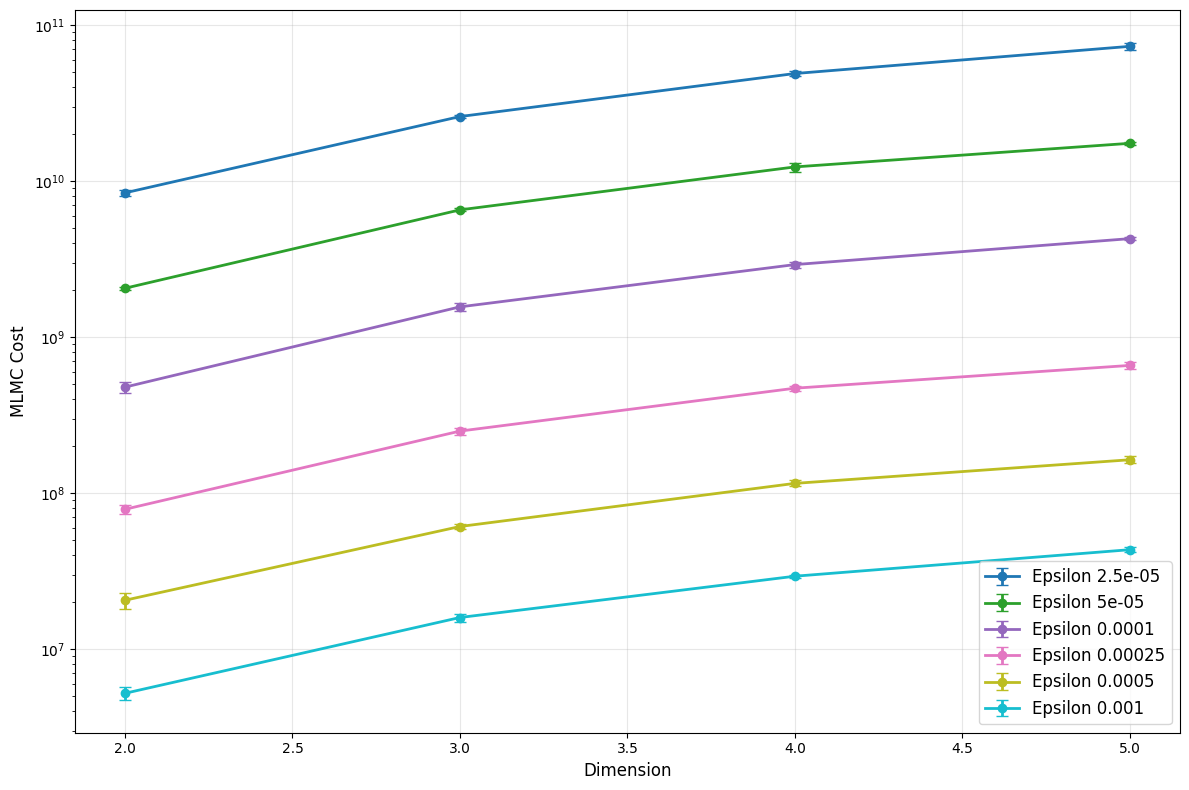

In [20]:
csv_file = "../cleanData/mlmc_speedup_scaling2_ratio2.csv"
csv_file4 = "../cleanData/mlmc_speedup_scaling2_ratio4.csv"
csv_file8 = "../cleanData/mlmc_speedup_scaling2_ratio8.csv"
csv_file16 = "../cleanData/mlmc_speedup_scaling2_ratio16.csv"
combined_data = combine_ratios(csv_file, csv_file4, csv_file8, csv_file16)
outfile="../plots/dt_ratio_comparison.pdf"
#plot_mlmc_cost_vs_dt_ratio(combined_data, save=False, name=outfile)
plot_mlmc_cost_vs_dimension(csv_file16, True, "../plots/mlmc_speedup_scaling2_ratio16_dim.pdf")

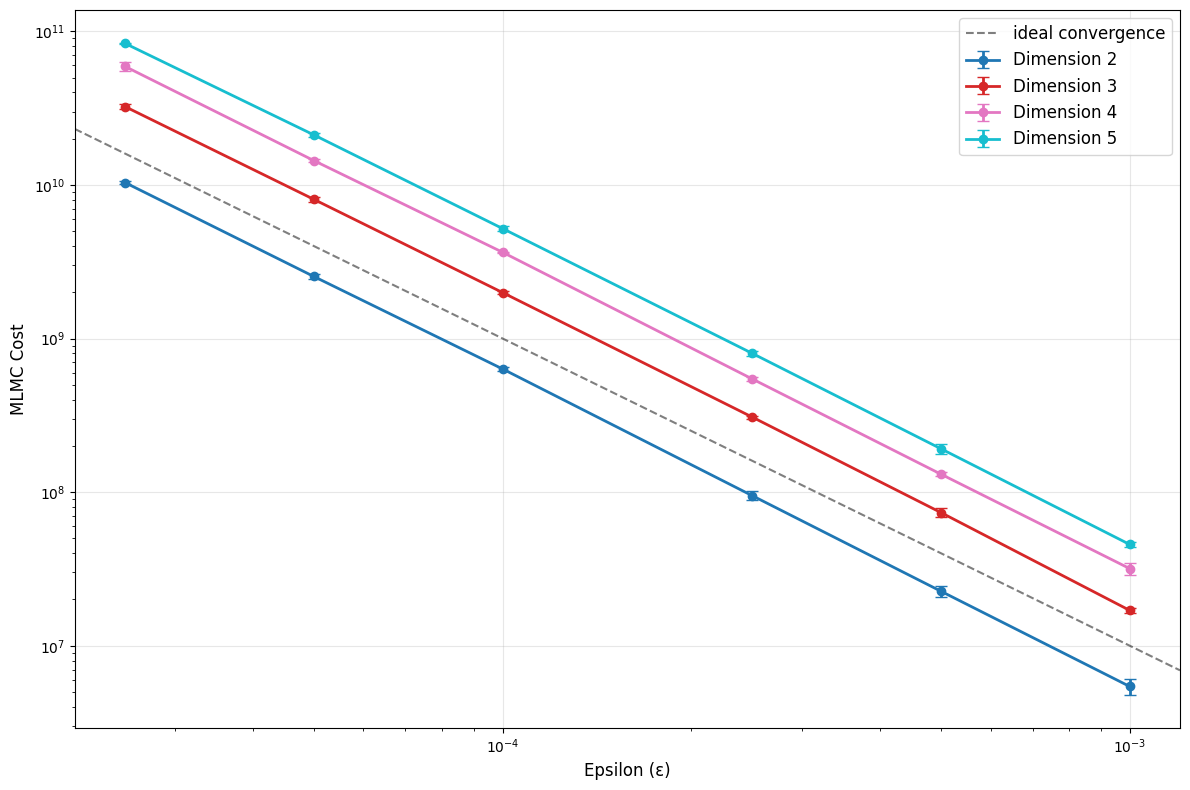


Summary Statistics:
Dimension 2:
  Epsilon range: 2.50e-05 - 1.00e-03
  MLMC cost range: 4.76e+06 - 1.07e+10
  Number of data points: 30

Dimension 3:
  Epsilon range: 2.50e-05 - 1.00e-03
  MLMC cost range: 1.63e+07 - 3.47e+10
  Number of data points: 30

Dimension 4:
  Epsilon range: 2.50e-05 - 1.00e-03
  MLMC cost range: 2.78e+07 - 6.63e+10
  Number of data points: 30

Dimension 5:
  Epsilon range: 2.50e-05 - 1.00e-03
  MLMC cost range: 4.33e+07 - 8.46e+10
  Number of data points: 30



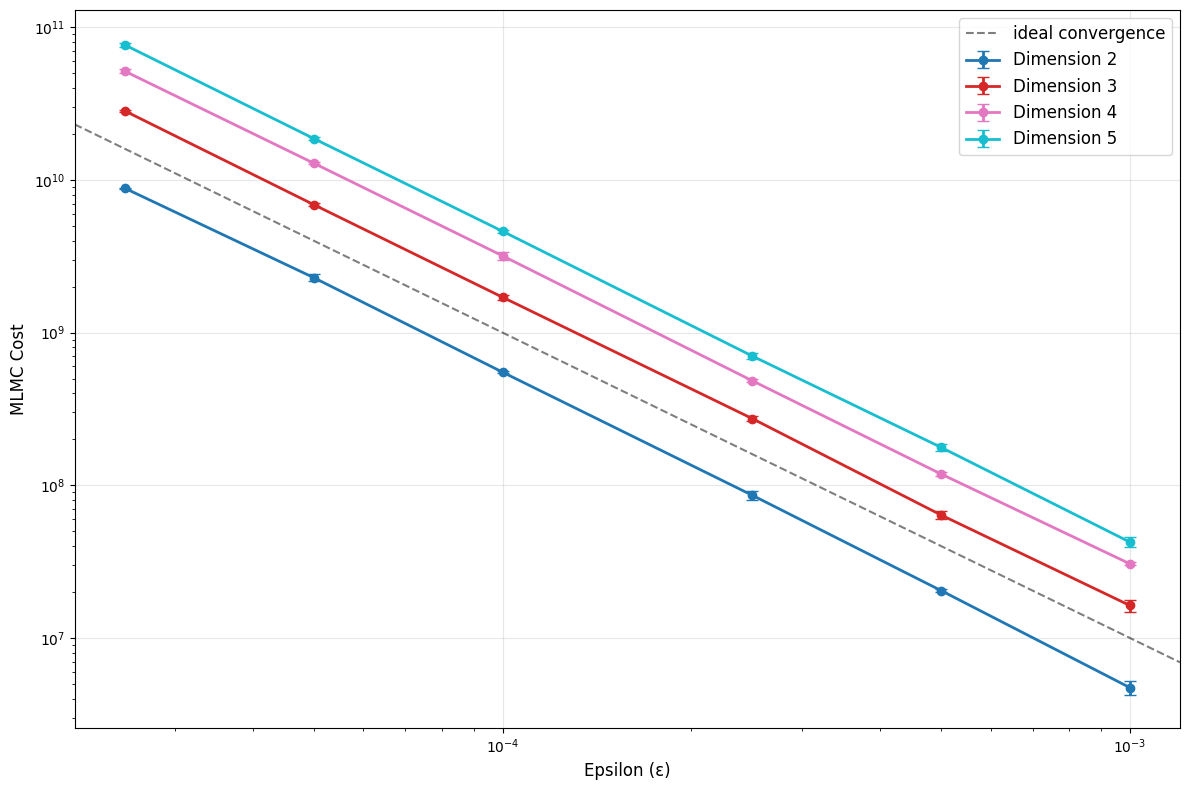


Summary Statistics:
Dimension 2:
  Epsilon range: 2.50e-05 - 1.00e-03
  MLMC cost range: 4.19e+06 - 8.97e+09
  Number of data points: 30

Dimension 3:
  Epsilon range: 2.50e-05 - 1.00e-03
  MLMC cost range: 1.43e+07 - 2.86e+10
  Number of data points: 30

Dimension 4:
  Epsilon range: 2.50e-05 - 1.00e-03
  MLMC cost range: 2.95e+07 - 5.39e+10
  Number of data points: 30

Dimension 5:
  Epsilon range: 2.50e-05 - 1.00e-03
  MLMC cost range: 3.89e+07 - 8.11e+10
  Number of data points: 30



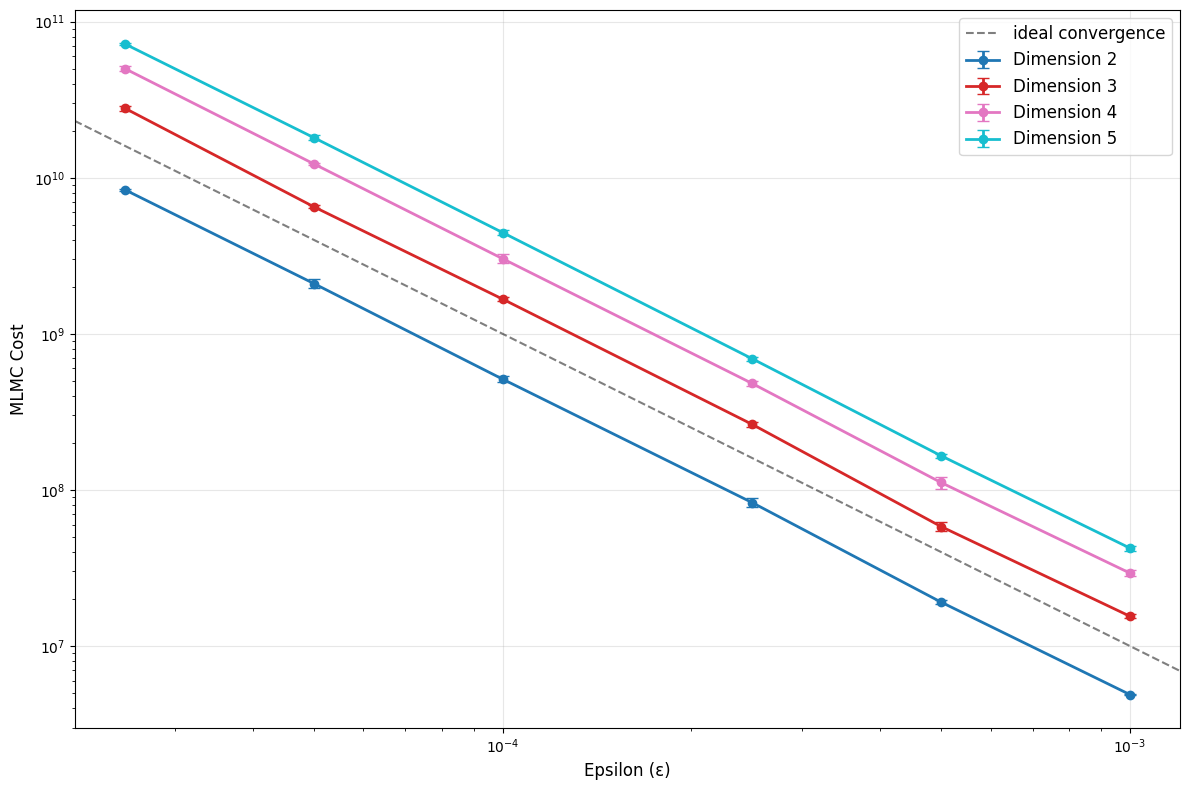


Summary Statistics:
Dimension 2:
  Epsilon range: 2.50e-05 - 1.00e-03
  MLMC cost range: 4.80e+06 - 8.49e+09
  Number of data points: 30

Dimension 3:
  Epsilon range: 2.50e-05 - 1.00e-03
  MLMC cost range: 1.47e+07 - 2.95e+10
  Number of data points: 30

Dimension 4:
  Epsilon range: 2.50e-05 - 1.00e-03
  MLMC cost range: 2.81e+07 - 5.35e+10
  Number of data points: 30

Dimension 5:
  Epsilon range: 2.50e-05 - 1.00e-03
  MLMC cost range: 4.08e+07 - 7.38e+10
  Number of data points: 30



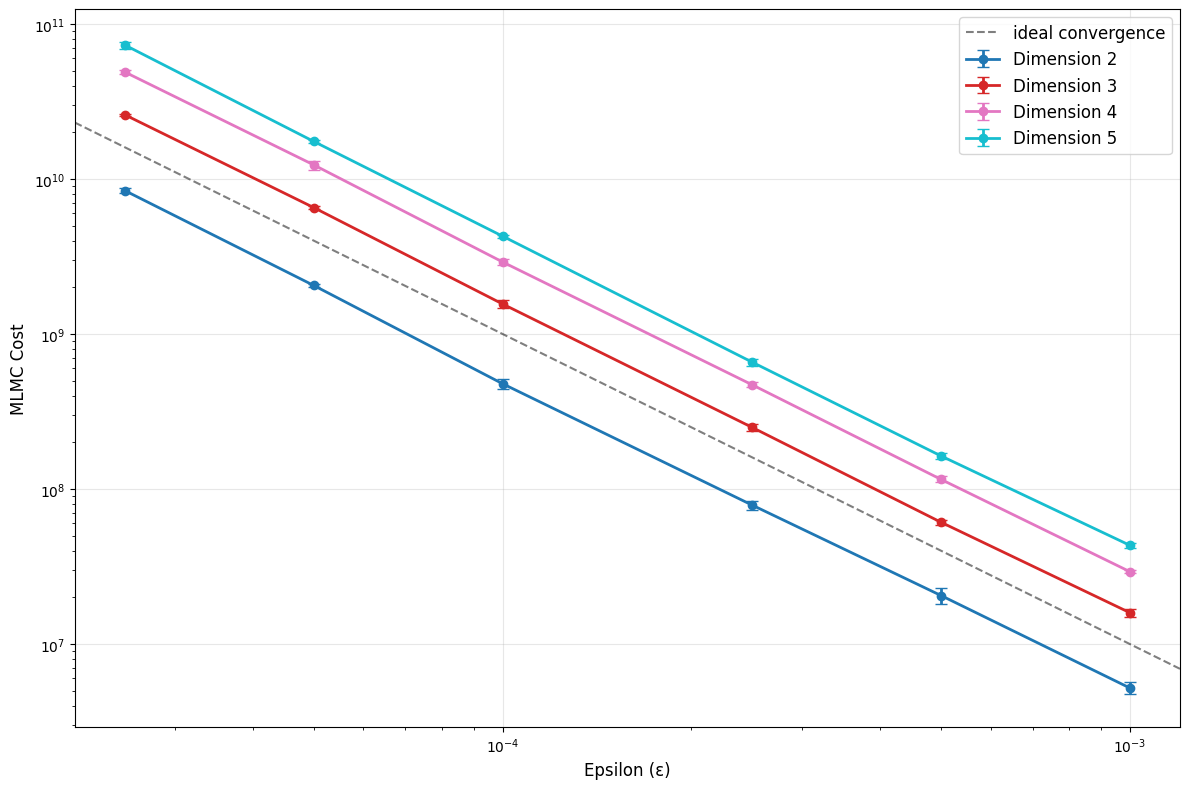


Summary Statistics:
Dimension 2:
  Epsilon range: 2.50e-05 - 1.00e-03
  MLMC cost range: 4.47e+06 - 8.83e+09
  Number of data points: 30

Dimension 3:
  Epsilon range: 2.50e-05 - 1.00e-03
  MLMC cost range: 1.51e+07 - 2.65e+10
  Number of data points: 30

Dimension 4:
  Epsilon range: 2.50e-05 - 1.00e-03
  MLMC cost range: 2.87e+07 - 5.12e+10
  Number of data points: 30

Dimension 5:
  Epsilon range: 2.50e-05 - 1.00e-03
  MLMC cost range: 4.15e+07 - 7.90e+10
  Number of data points: 30



In [6]:

outfile2 = "../plots/dt_ratio2_convergence.pdf"
outfile4 = "../plots/dt_ratio4_convergence.pdf"
outfile8 = "../plots/dt_ratio8_convergence.pdf"
outfile16 = "../plots/dt_ratio16_convergence.pdf"
save = False
plot_mlmc_cost_vs_epsilon(csv_file, save, outfile2)
plot_mlmc_cost_vs_epsilon(csv_file4, save, outfile4)
plot_mlmc_cost_vs_epsilon(csv_file8, save, outfile8)
plot_mlmc_cost_vs_epsilon(csv_file16, save, outfile16)


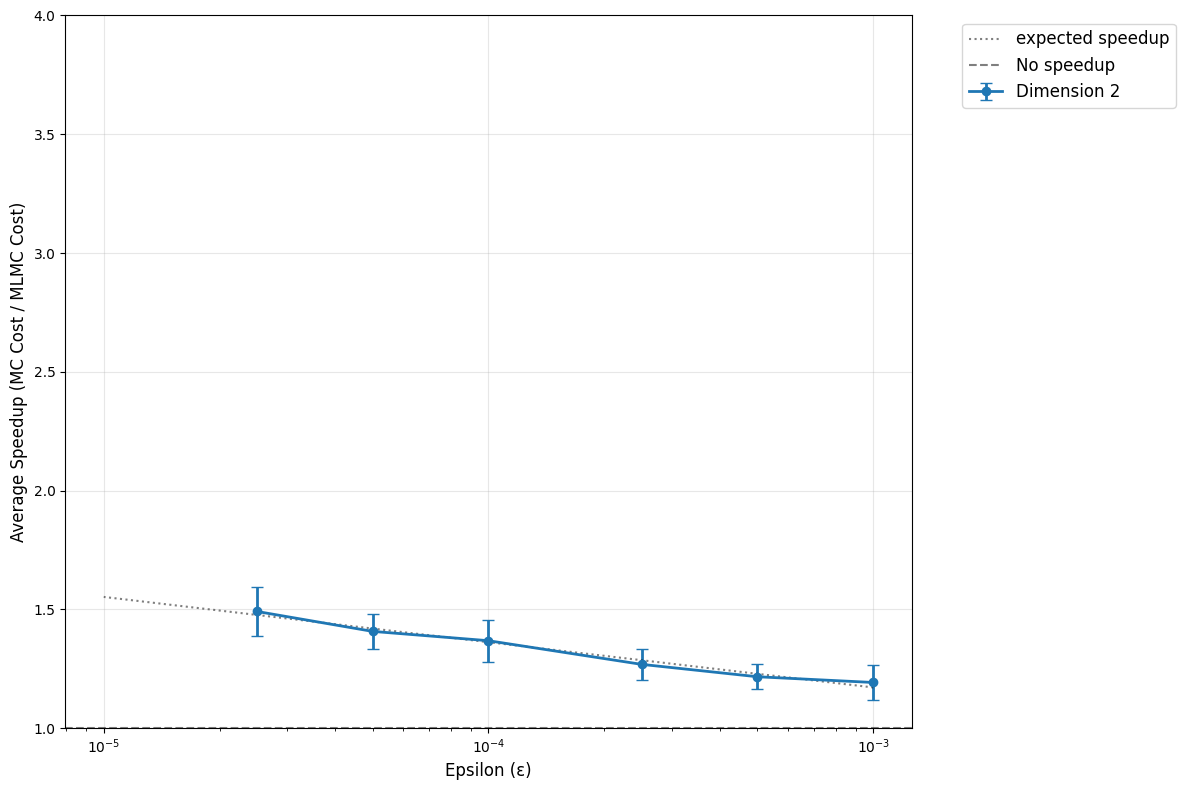


Grouped Speedup Statistics:
Dimension 2:
  Number of epsilon values: 6
  Overall speedup range: 1.19x - 1.49x
  Overall average speedup: 1.32x
  Data points per epsilon: 5 (assuming uniform)



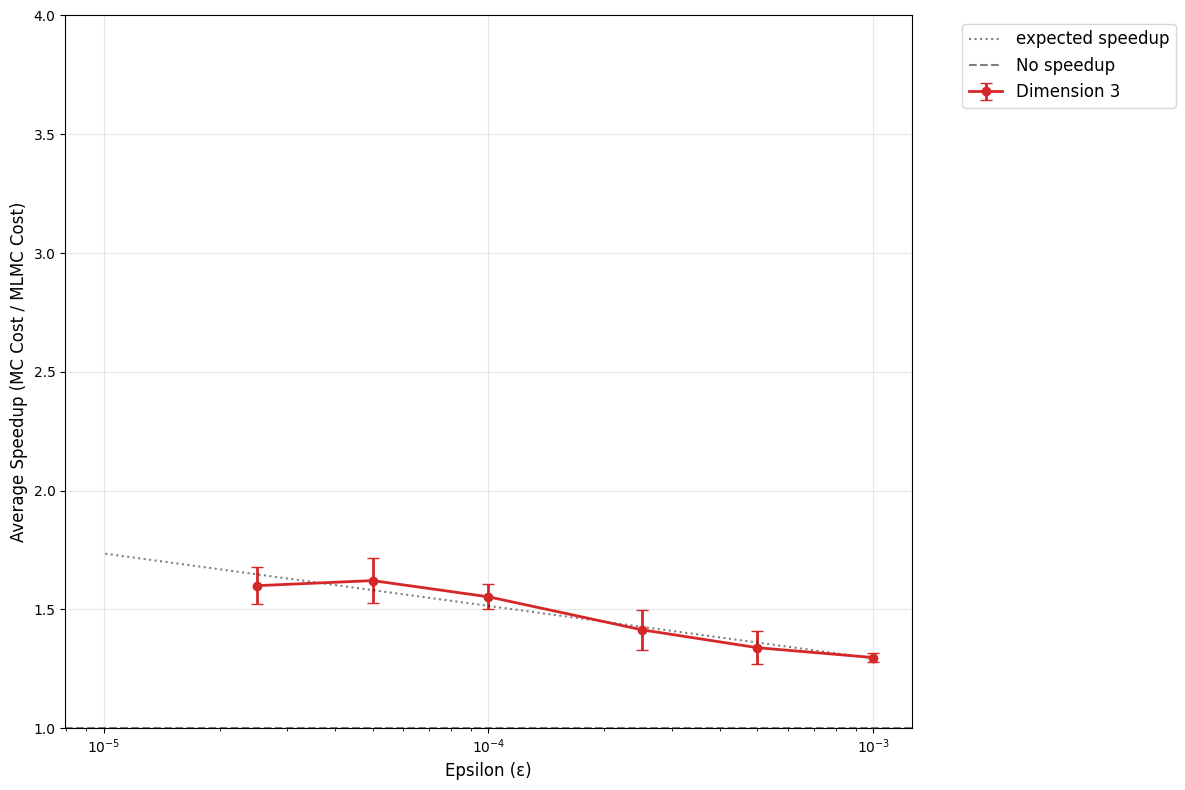


Grouped Speedup Statistics:
Dimension 3:
  Number of epsilon values: 6
  Overall speedup range: 1.30x - 1.62x
  Overall average speedup: 1.47x
  Data points per epsilon: 5 (assuming uniform)



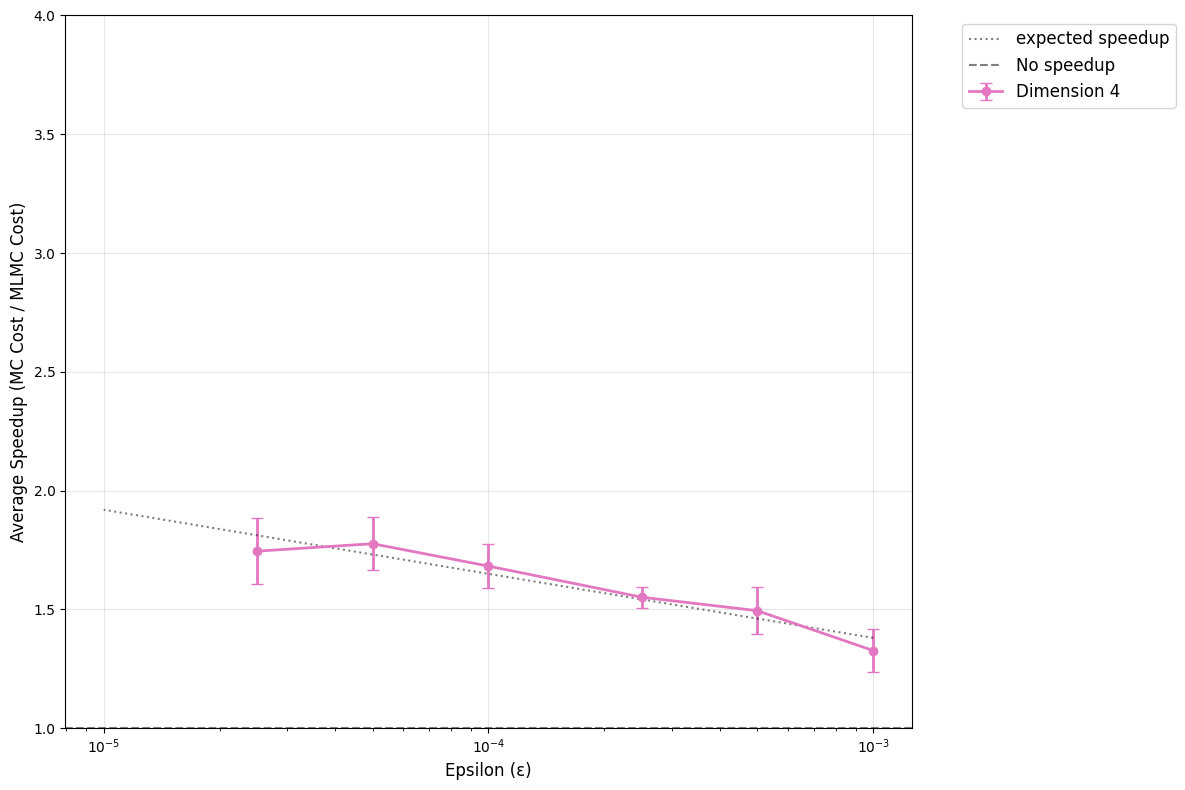


Grouped Speedup Statistics:
Dimension 4:
  Number of epsilon values: 6
  Overall speedup range: 1.33x - 1.78x
  Overall average speedup: 1.60x
  Data points per epsilon: 5 (assuming uniform)



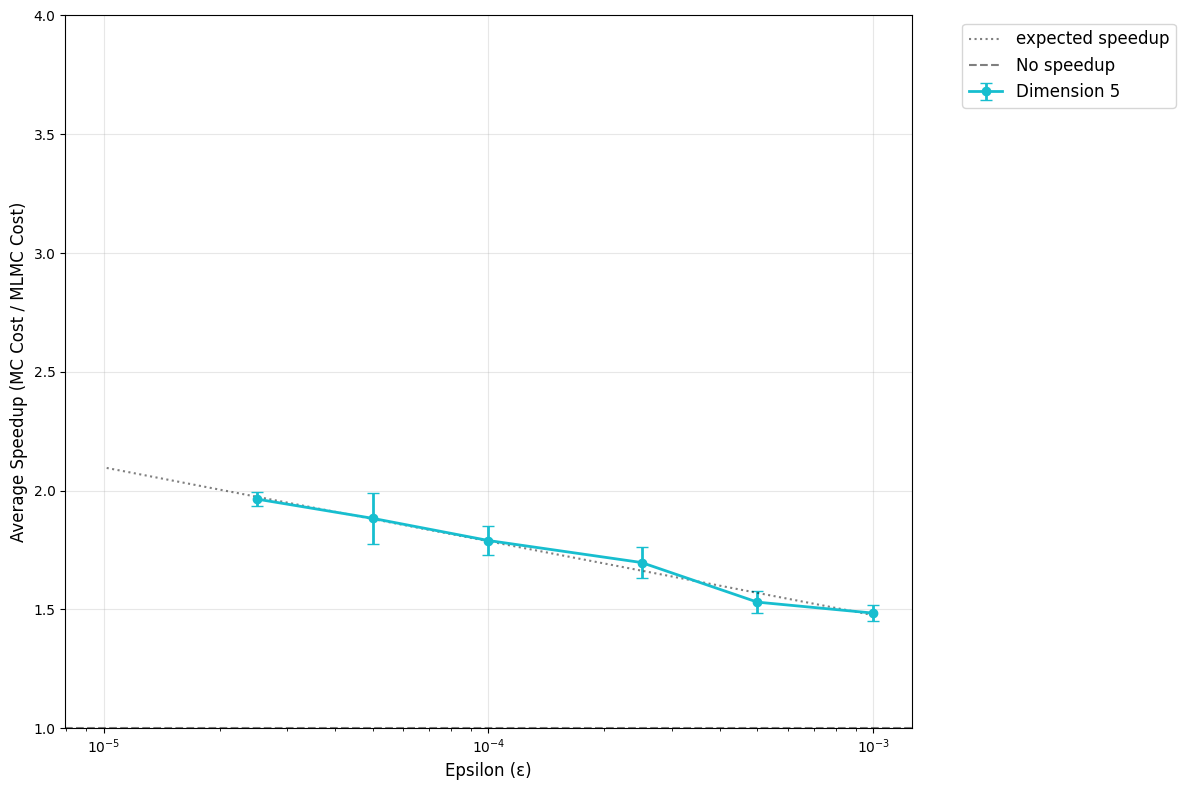


Grouped Speedup Statistics:
Dimension 5:
  Number of epsilon values: 6
  Overall speedup range: 1.48x - 1.96x
  Overall average speedup: 1.72x
  Data points per epsilon: 5 (assuming uniform)



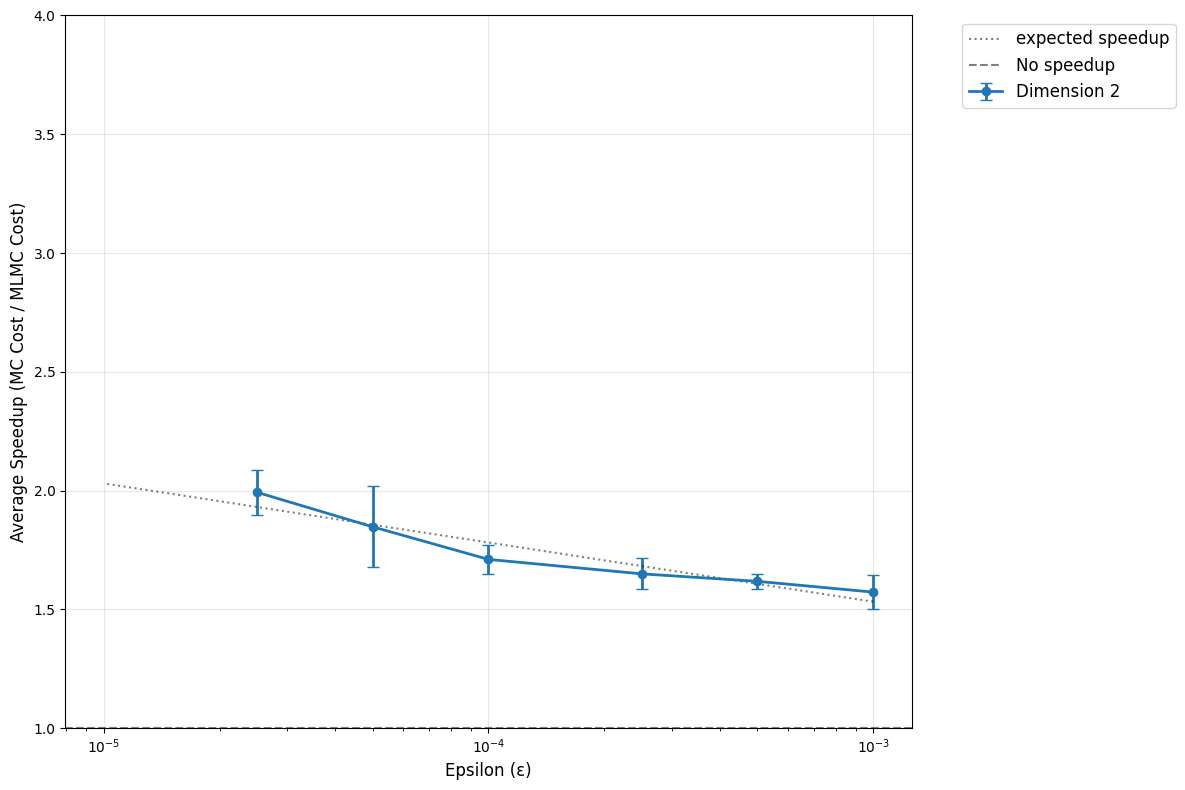


Grouped Speedup Statistics:
Dimension 2:
  Number of epsilon values: 6
  Overall speedup range: 1.57x - 1.99x
  Overall average speedup: 1.73x
  Data points per epsilon: 5 (assuming uniform)



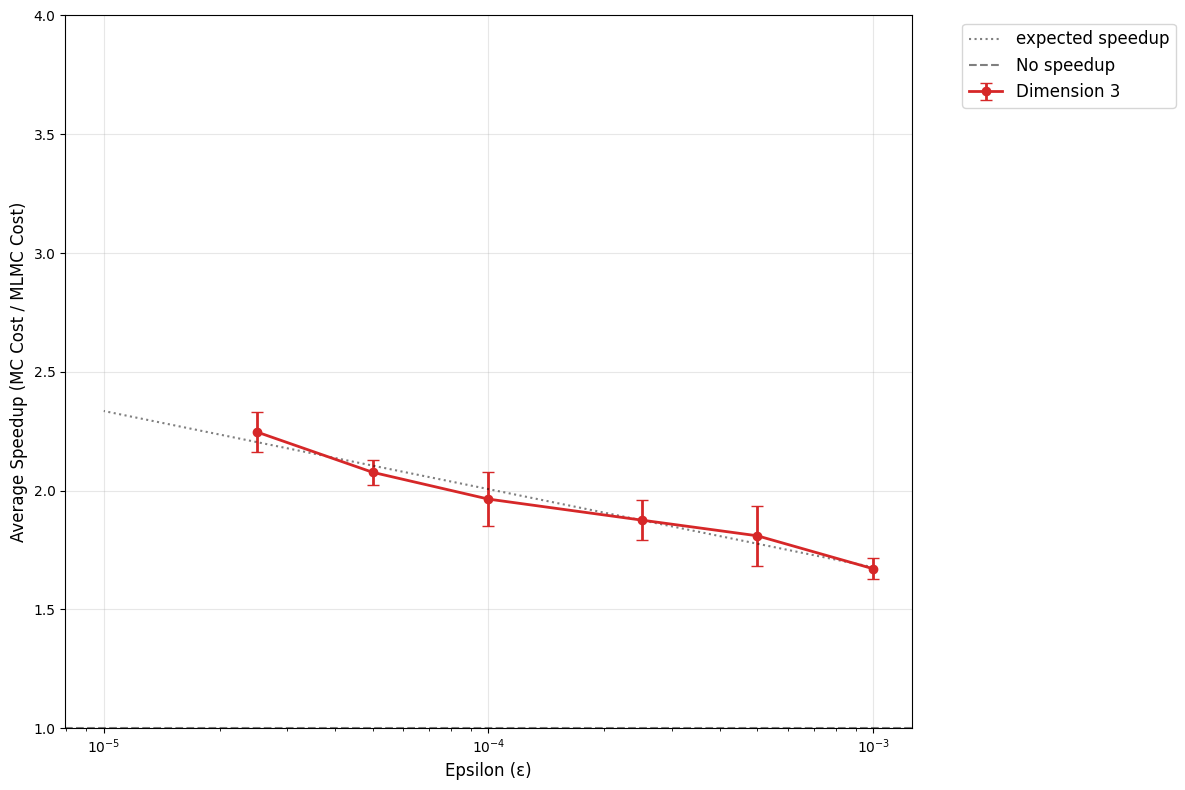


Grouped Speedup Statistics:
Dimension 3:
  Number of epsilon values: 6
  Overall speedup range: 1.67x - 2.25x
  Overall average speedup: 1.94x
  Data points per epsilon: 5 (assuming uniform)



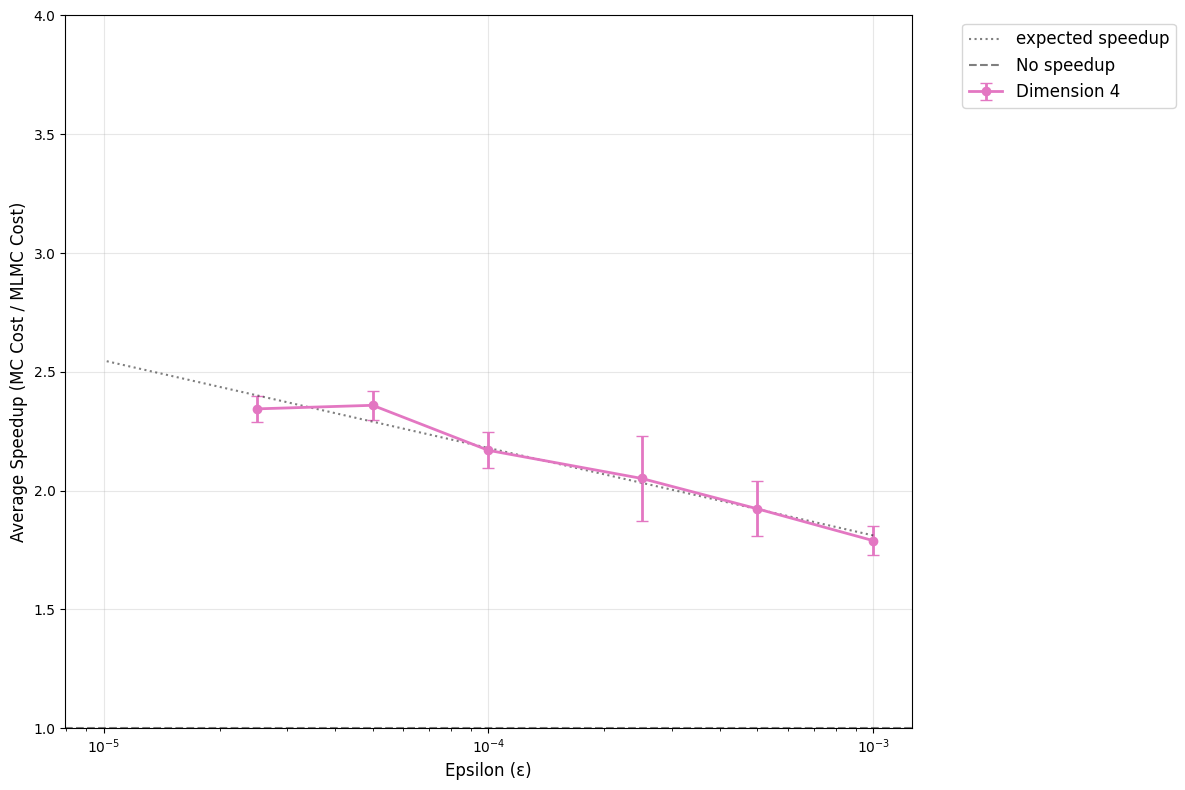


Grouped Speedup Statistics:
Dimension 4:
  Number of epsilon values: 6
  Overall speedup range: 1.79x - 2.36x
  Overall average speedup: 2.11x
  Data points per epsilon: 5 (assuming uniform)



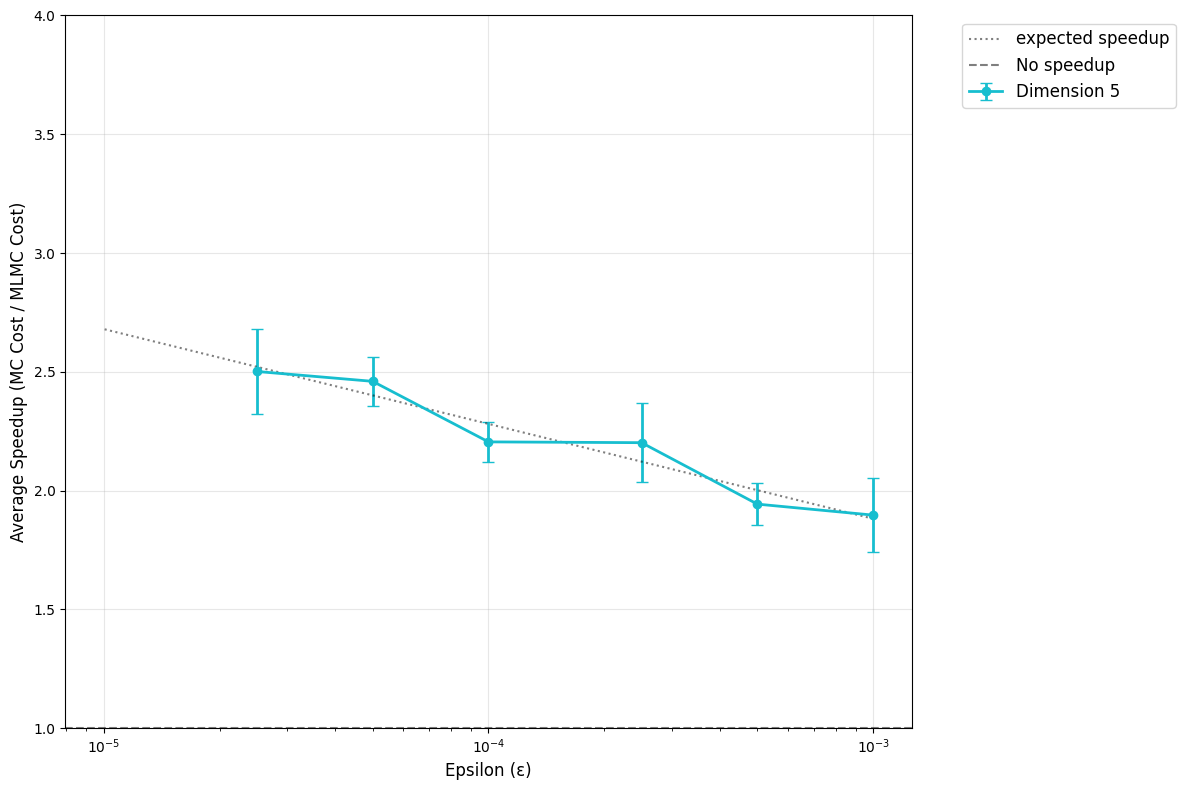


Grouped Speedup Statistics:
Dimension 5:
  Number of epsilon values: 6
  Overall speedup range: 1.90x - 2.50x
  Overall average speedup: 2.20x
  Data points per epsilon: 5 (assuming uniform)



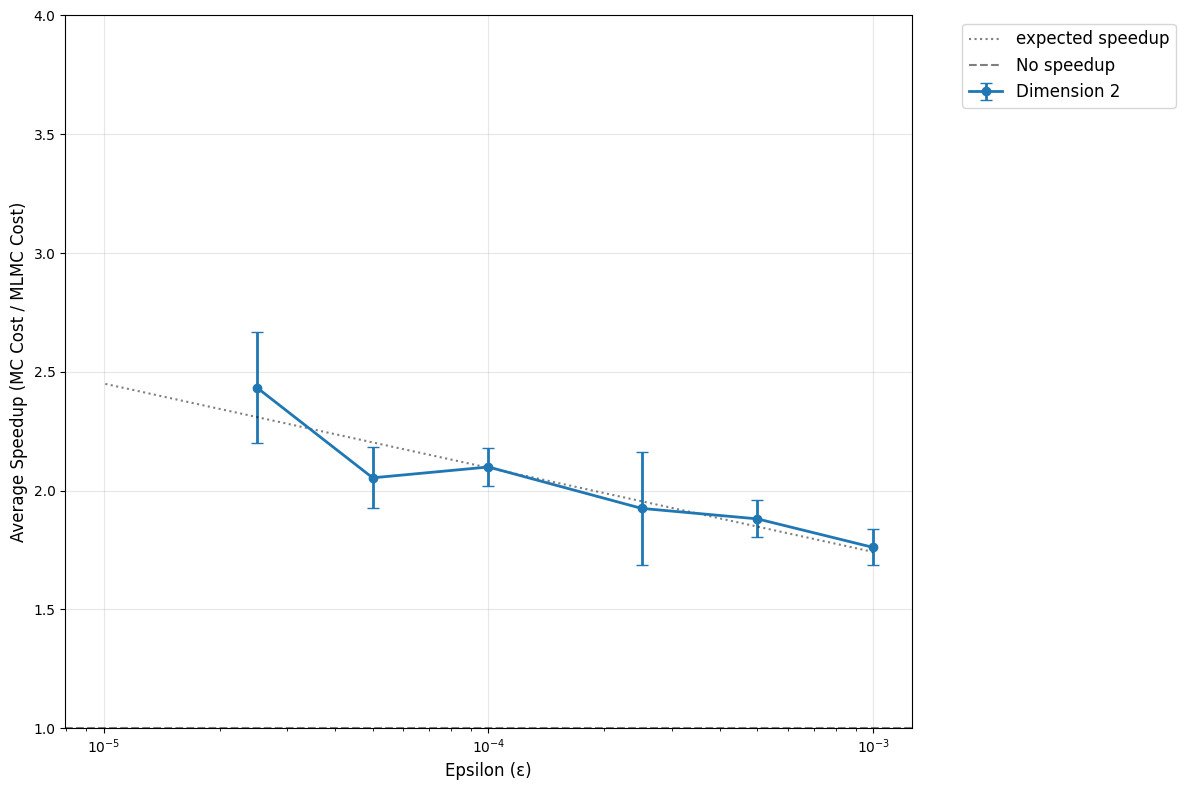


Grouped Speedup Statistics:
Dimension 2:
  Number of epsilon values: 6
  Overall speedup range: 1.76x - 2.43x
  Overall average speedup: 2.03x
  Data points per epsilon: 5 (assuming uniform)



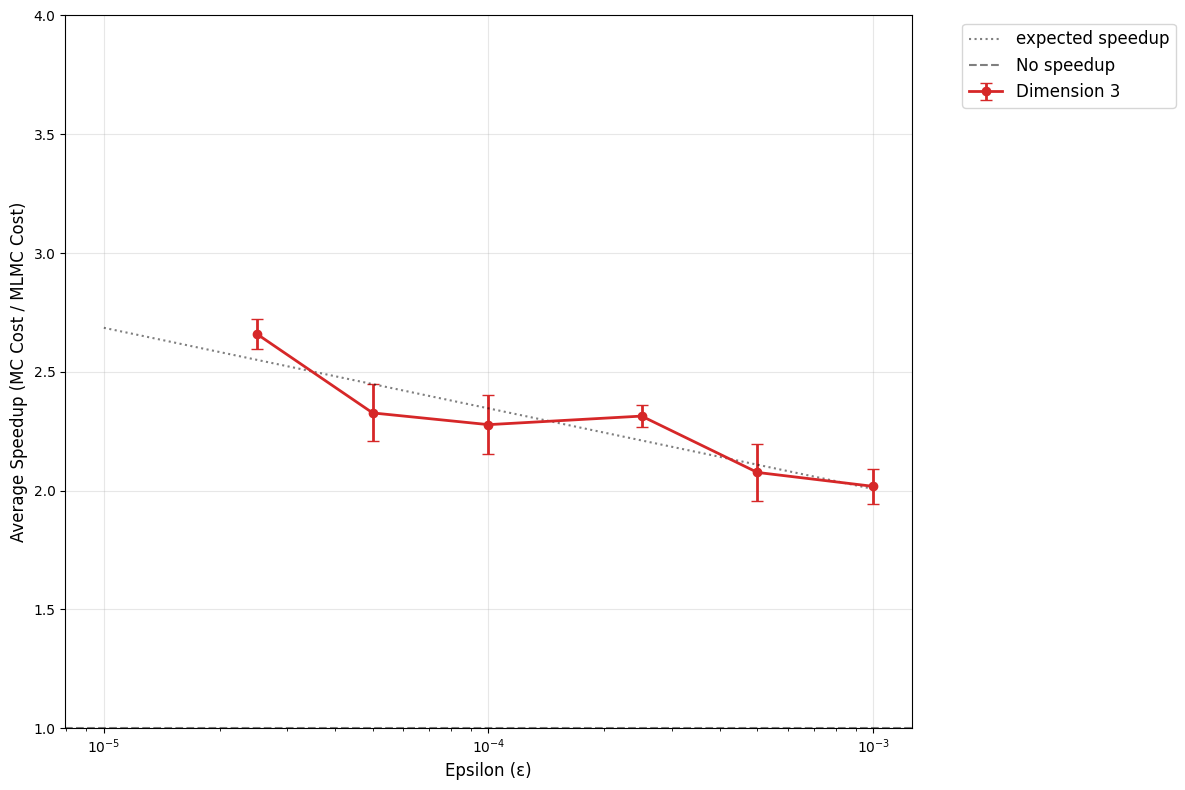


Grouped Speedup Statistics:
Dimension 3:
  Number of epsilon values: 6
  Overall speedup range: 2.02x - 2.66x
  Overall average speedup: 2.28x
  Data points per epsilon: 5 (assuming uniform)



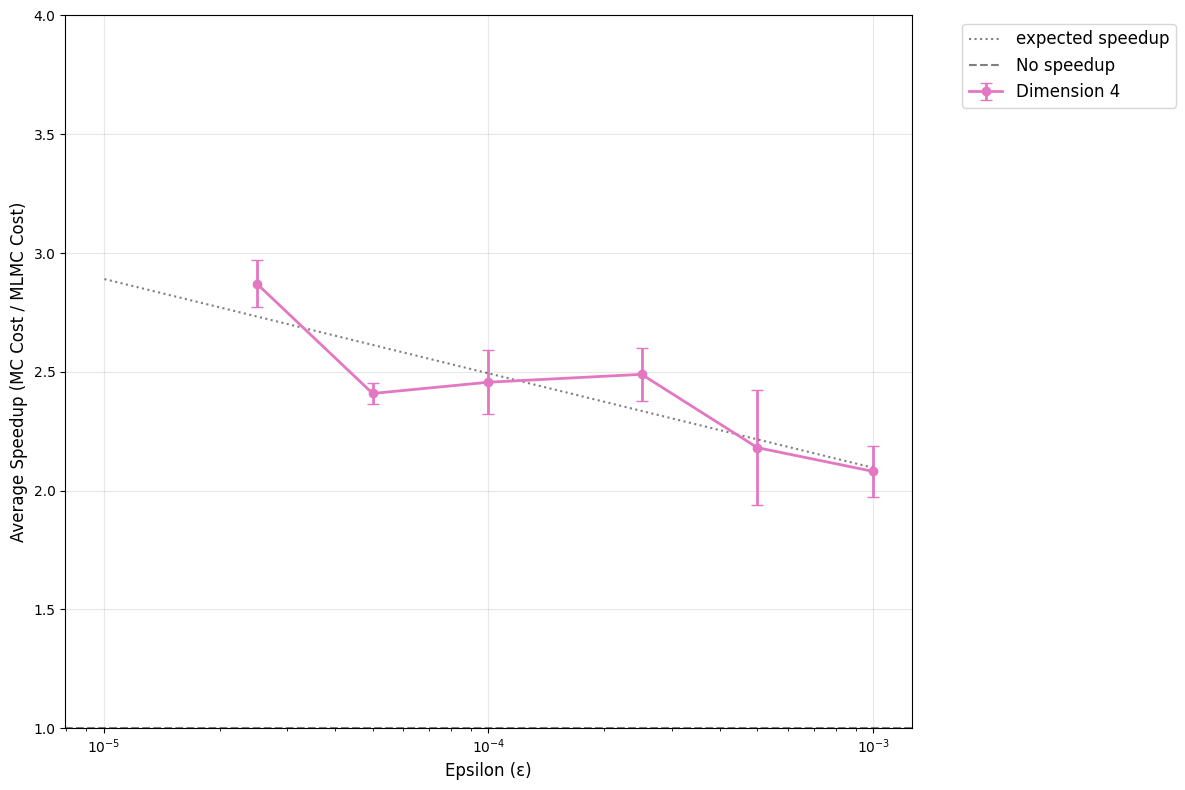


Grouped Speedup Statistics:
Dimension 4:
  Number of epsilon values: 6
  Overall speedup range: 2.08x - 2.87x
  Overall average speedup: 2.41x
  Data points per epsilon: 5 (assuming uniform)



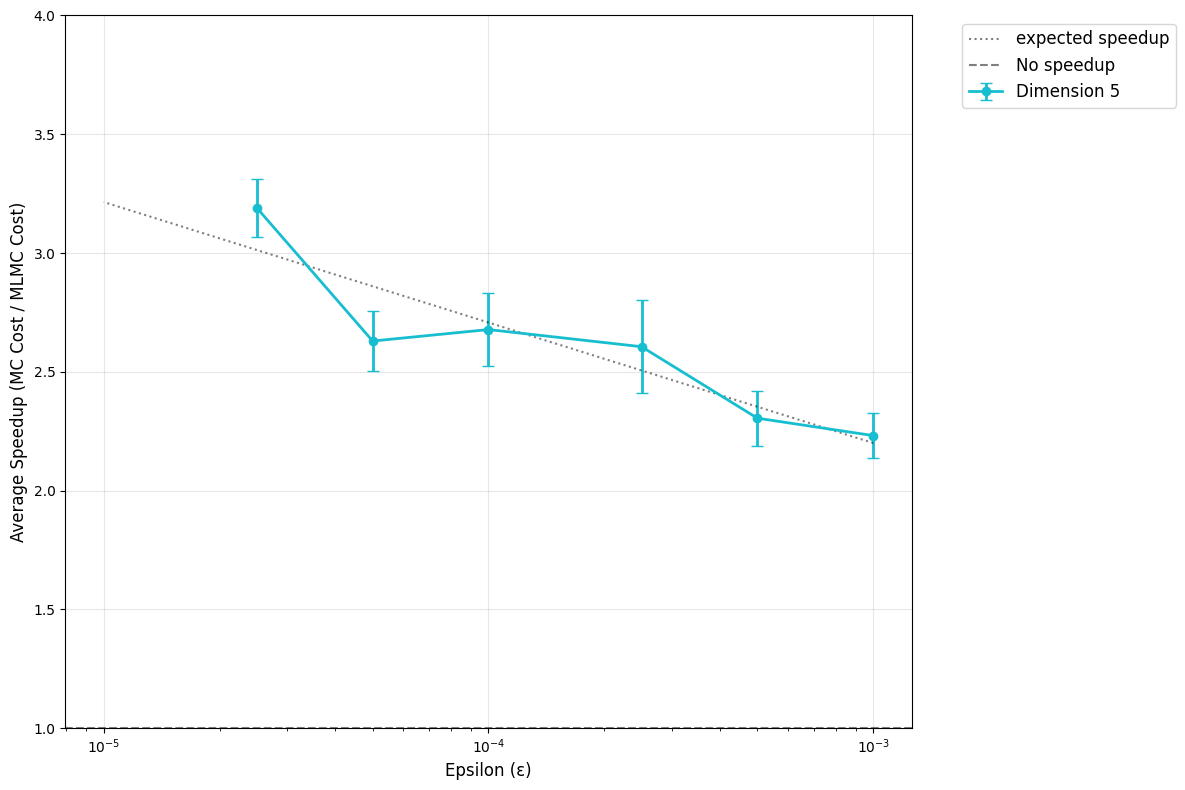


Grouped Speedup Statistics:
Dimension 5:
  Number of epsilon values: 6
  Overall speedup range: 2.23x - 3.19x
  Overall average speedup: 2.61x
  Data points per epsilon: 5 (assuming uniform)



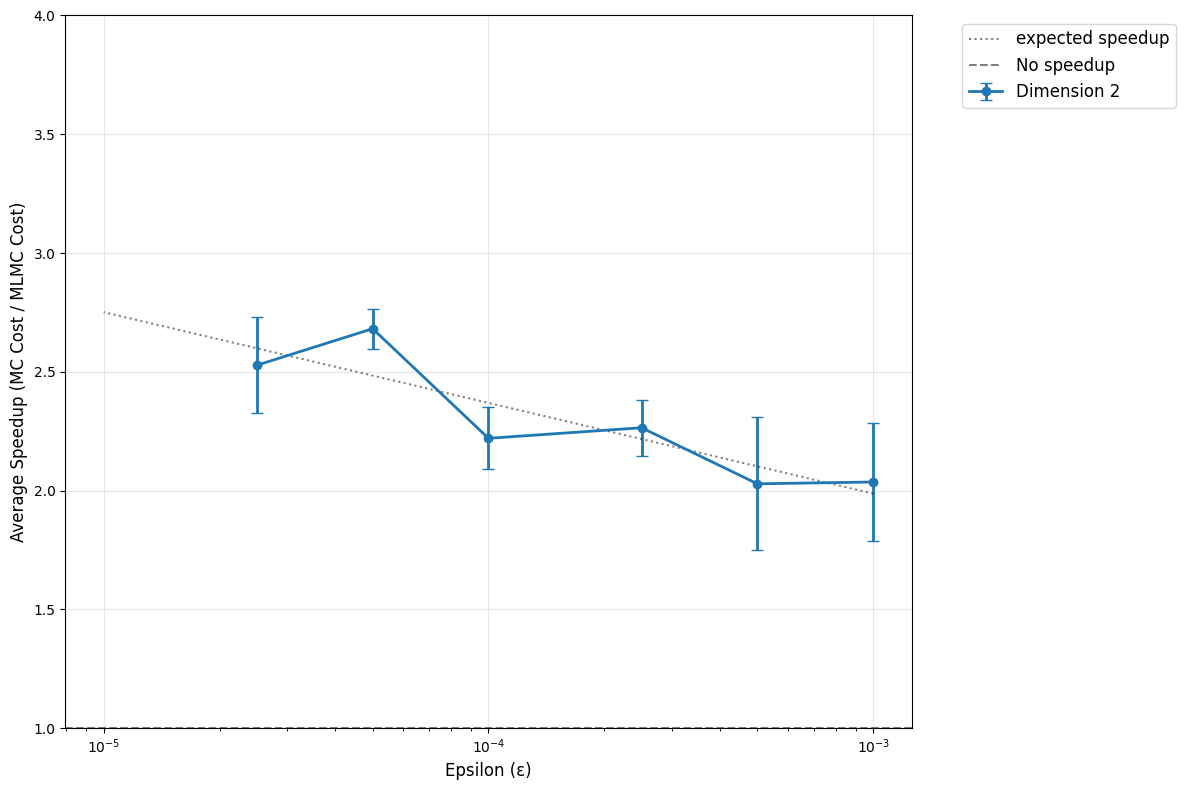


Grouped Speedup Statistics:
Dimension 2:
  Number of epsilon values: 6
  Overall speedup range: 2.03x - 2.68x
  Overall average speedup: 2.29x
  Data points per epsilon: 5 (assuming uniform)



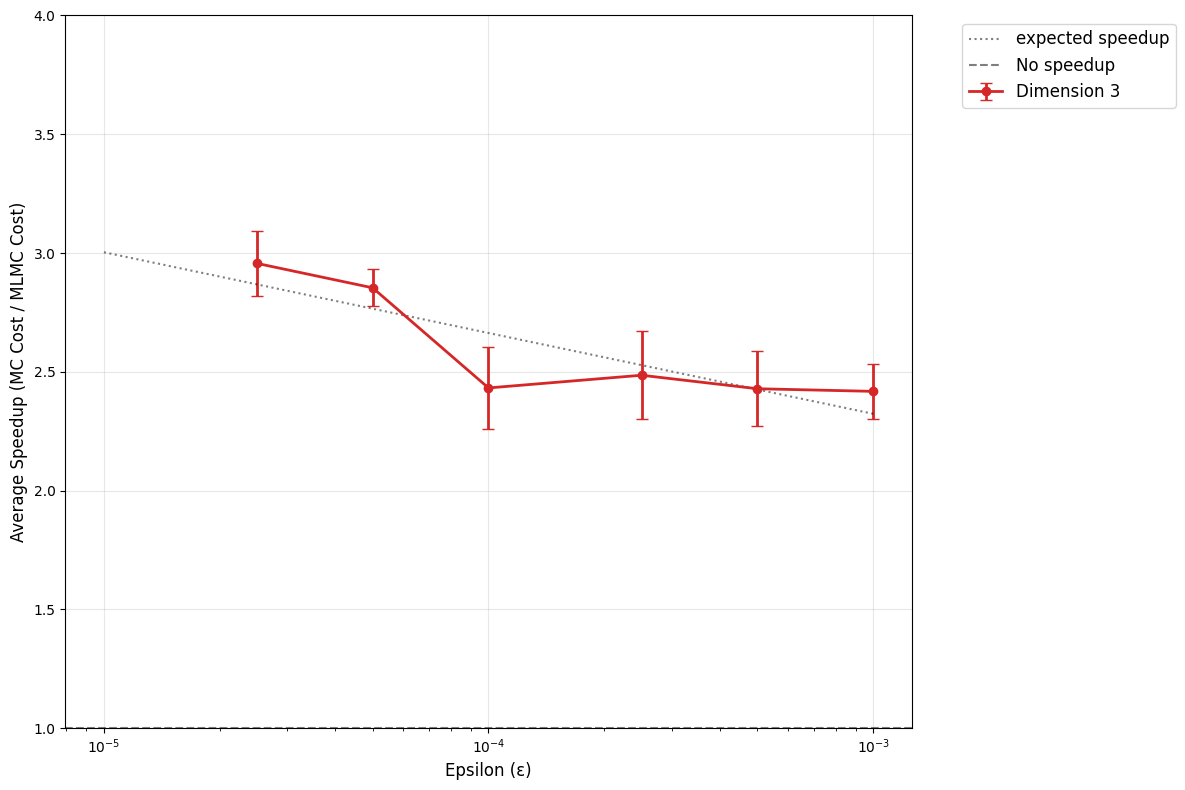


Grouped Speedup Statistics:
Dimension 3:
  Number of epsilon values: 6
  Overall speedup range: 2.42x - 2.96x
  Overall average speedup: 2.60x
  Data points per epsilon: 5 (assuming uniform)



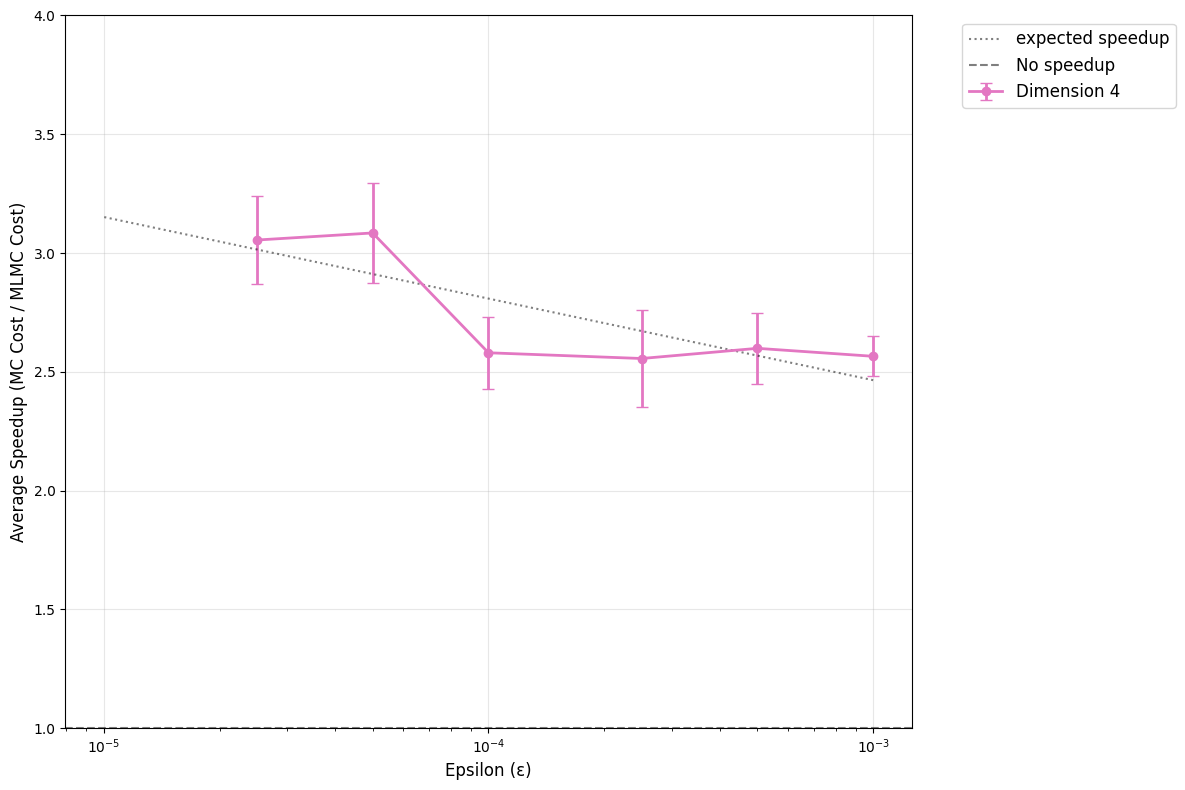


Grouped Speedup Statistics:
Dimension 4:
  Number of epsilon values: 6
  Overall speedup range: 2.56x - 3.08x
  Overall average speedup: 2.74x
  Data points per epsilon: 5 (assuming uniform)



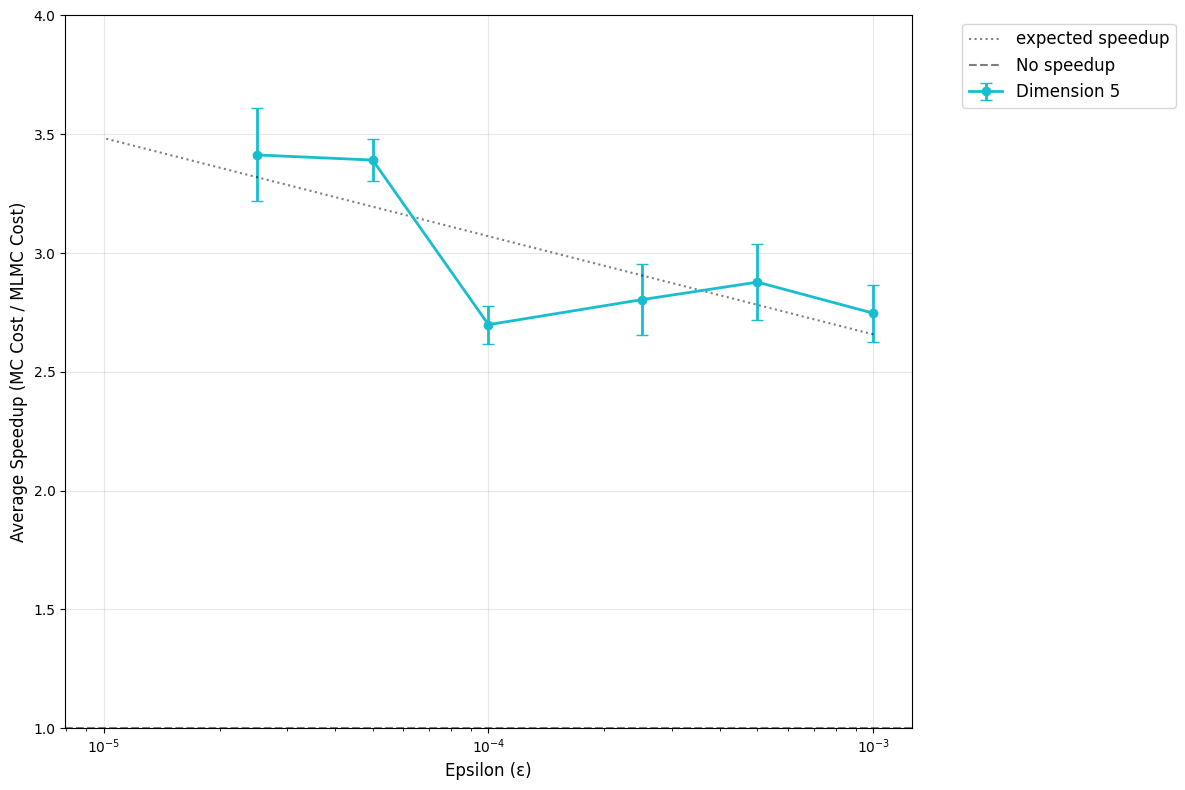


Grouped Speedup Statistics:
Dimension 5:
  Number of epsilon values: 6
  Overall speedup range: 2.70x - 3.41x
  Overall average speedup: 2.99x
  Data points per epsilon: 5 (assuming uniform)



In [28]:
# Additional comparison plot
def plot_and_save_file(inputfile, outputfile_base):
    for dim in range(2,6):
        outputfile = outputfile_base + str(dim) + ".pdf"
        plot_speedup(inputfile,dim,save=True,name=outputfile)

outfile2 = "../plots/dt_ratio2_speedups"
outfile4 = "../plots/dt_ratio4_speedups"
outfile8 = "../plots/dt_ratio8_speedups"
outfile16 = "../plots/dt_ratio16_speedups"
plot_and_save_file(csv_file, outfile2)
plot_and_save_file(csv_file4, outfile4)
plot_and_save_file(csv_file8, outfile8)
plot_and_save_file(csv_file16, outfile16)

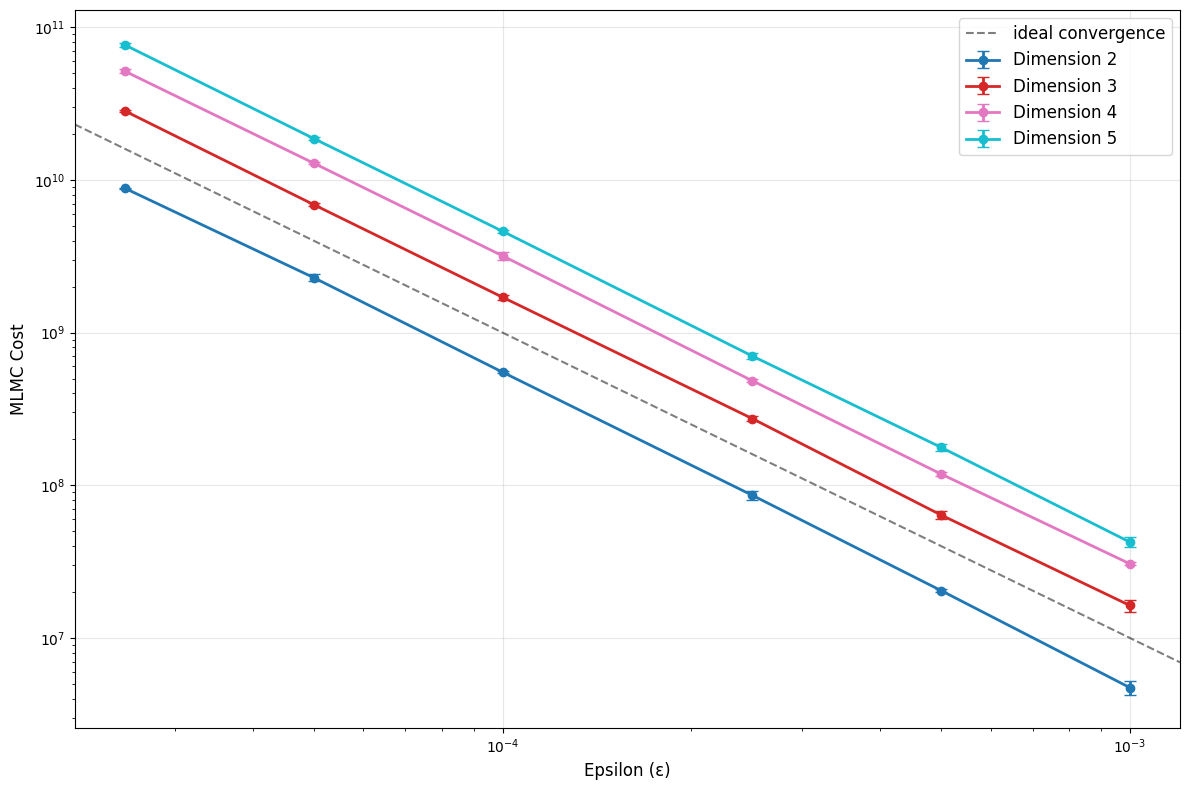


Summary Statistics:
Dimension 2:
  Epsilon range: 2.50e-05 - 1.00e-03
  MLMC cost range: 4.19e+06 - 8.97e+09
  Number of data points: 30

Dimension 3:
  Epsilon range: 2.50e-05 - 1.00e-03
  MLMC cost range: 1.43e+07 - 2.86e+10
  Number of data points: 30

Dimension 4:
  Epsilon range: 2.50e-05 - 1.00e-03
  MLMC cost range: 2.95e+07 - 5.39e+10
  Number of data points: 30

Dimension 5:
  Epsilon range: 2.50e-05 - 1.00e-03
  MLMC cost range: 3.89e+07 - 8.11e+10
  Number of data points: 30



In [8]:

# Main plot: MLMC cost vs epsilon for each dimension
plot_mlmc_cost_vs_epsilon(csv_file4)

In [9]:
plot_speedup(csv_file4)

TypeError: plot_speedup() missing 1 required positional argument: 'dim'

In [ ]:
plot_mlmc_cost_vs_epsilon(csv_file8)

In [ ]:
plot_speedup(csv_file8)

In [ ]:
plot_mlmc_cost_vs_epsilon(csv_file16)

In [ ]:
plot_speedup(csv_file16)

In [22]:
def plot_mlmc_vs_cg_time(df, save=False, name=None):
    """
    Plot MLMC cost vs epsilon for each dimension from the extracted CSV data.

    Args:
        csv_file: Path to the CSV file containing MLMC data
    """
    print(df.columns)
    # Group by dimension and epsilon, calculate statistics
    grouped = df.groupby(['dimension']).agg({
        'mlmc time': ['mean', 'std', 'count'],
        'cg time': ['mean', 'std', 'count']
    }).reset_index()

    # Flatten column names
    grouped.columns = ['dimension', 'mlmc time_mean',
                       'mlmc time_std', 'mlmc time_count',
                       'cg time_mean', 'cg time_std', 'cg time_count']

    # Get unique dimensions and sort them
    dimensions = sorted(grouped['dimension'].unique())

    # Create the plot
    plt.figure(figsize=(12, 8))

    # Color map for different dimensions
    colors = plt.cm.tab10(np.linspace(0, 1, len(dimensions)))
    # Filter data for current dimension
    dim_data = grouped.copy()

    # Sort by epsilon for proper line plotting
    dim_data = dim_data.sort_values('dimension')
    # Plot MLMC cost vs epsilonp
    print(dim_data['mlmc time_mean'])
    
    #for i, mlmc in enumerate(dim_data['mlmc time_mean']):
        #dim_data.at[i, 'mlmc time_mean'] = 128**(i+2)*mlmc
    plt.errorbar(dim_data['dimension'], dim_data['mlmc time_mean'], 
                yerr=dim_data['mlmc time_std'], 
                fmt='o-', color=colors[0], label=f'MLMC Feynman-Kac solver',
                linewidth=2, markersize=6, capsize=4, capthick=1)
    # Plot MLMC cost vs epsilon
    plt.errorbar(dim_data['dimension'], dim_data['cg time_mean'], 
                yerr=dim_data['cg time_std'], 
                fmt='o-', color=colors[1], label=f'CG solver',
                linewidth=2, markersize=6, capsize=4, capthick=1)

    # Customize the plot
    plt.xlabel('Dimension', fontsize=12)
    plt.xticks(dimensions)
    plt.ylabel('Time', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize='x-large')

    # Set log scale for both axes
    plt.yscale('log')
    plt.xscale('log')

    # Adjust layout to prevent legend cutoff
    plt.tight_layout()
    
    if save:
        plt.savefig(name)
    # Show the plot
    plt.show()


Index(['dimension', 'mlmc error', 'mlmc time', 'cg point error', 'cg l2 error',
       'cg time'],
      dtype='object')
0    0.002834
1    0.009434
2    0.021751
3    0.033119
4    0.051695
Name: mlmc time_mean, dtype: float64


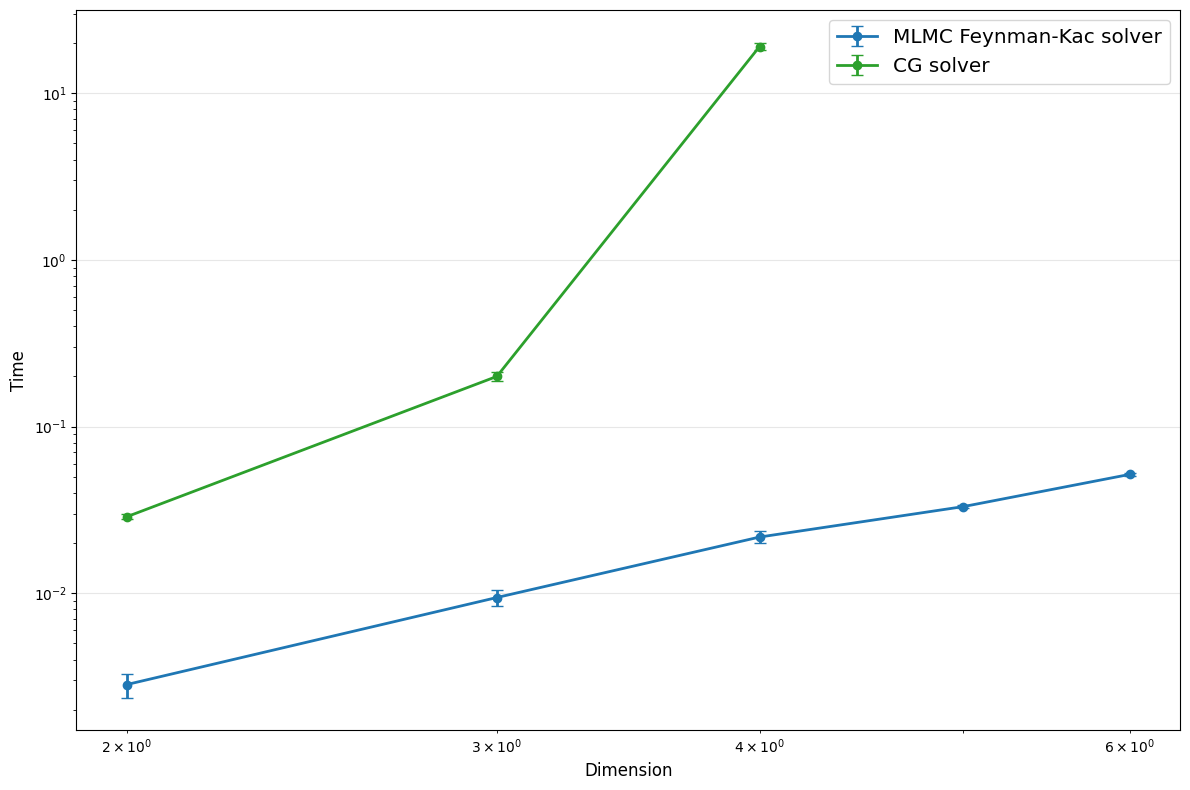

In [23]:
cg_data = pd.read_csv("../cleanData/cg_comparison_large_mesh.csv")

name = "../plots/cg_vs_mlmc_time_bad.pdf"
plot_mlmc_vs_cg_time(cg_data, False, name)

In [25]:
csv_file = "../cleanData/mlmc_ratio16_gaussian.csv"
outfile = "../plots/mlmc_ratio16_gaussian_convergence.pdf"
plot_mlmc_cost_vs_epsilon(csv_file, True, outfile)
plot_mlmc_cost_vs_dimension(csv_file, True, "../plots/mlmc_ratio16_gaussian_dim.pdf")

/tmp/ipykernel_1985/4201536066.py:50: SyntaxWarning: invalid escape sequence '\s'
  label='$\frac{1}{\sqrt{W}}$')


ValueError: 
$rac{1}{\sqrt{W}}$
^
ParseException: Expected end of text, found '$'  (at char 0), (line:1, col:1)

Error in callback <function _draw_all_if_interactive at 0x7f1d2dda56c0> (for post_execute), with arguments args (),kwargs {}:


ValueError: 
$rac{1}{\sqrt{W}}$
^
ParseException: Expected end of text, found '$'  (at char 0), (line:1, col:1)

ValueError: 
$rac{1}{\sqrt{W}}$
^
ParseException: Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 1200x800 with 1 Axes>

0     9.581611e+11
6     1.586943e+12
12    2.387452e+12
Name: mlmc_cost_mean, dtype: float64
1     2.392695e+11
7     3.869542e+11
13    5.932492e+11
18    8.953472e+11
Name: mlmc_cost_mean, dtype: float64
2     5.977788e+10
8     1.008876e+11
14    1.467943e+11
19    2.235890e+11
Name: mlmc_cost_mean, dtype: float64
3     9.444357e+09
9     1.573849e+10
15    2.370371e+10
20    3.390758e+10
Name: mlmc_cost_mean, dtype: float64
4     2.398570e+09
10    4.031706e+09
16    5.850299e+09
21    8.650045e+09
Name: mlmc_cost_mean, dtype: float64
5     5.975354e+08
11    9.823585e+08
17    1.548017e+09
22    2.197186e+09
Name: mlmc_cost_mean, dtype: float64


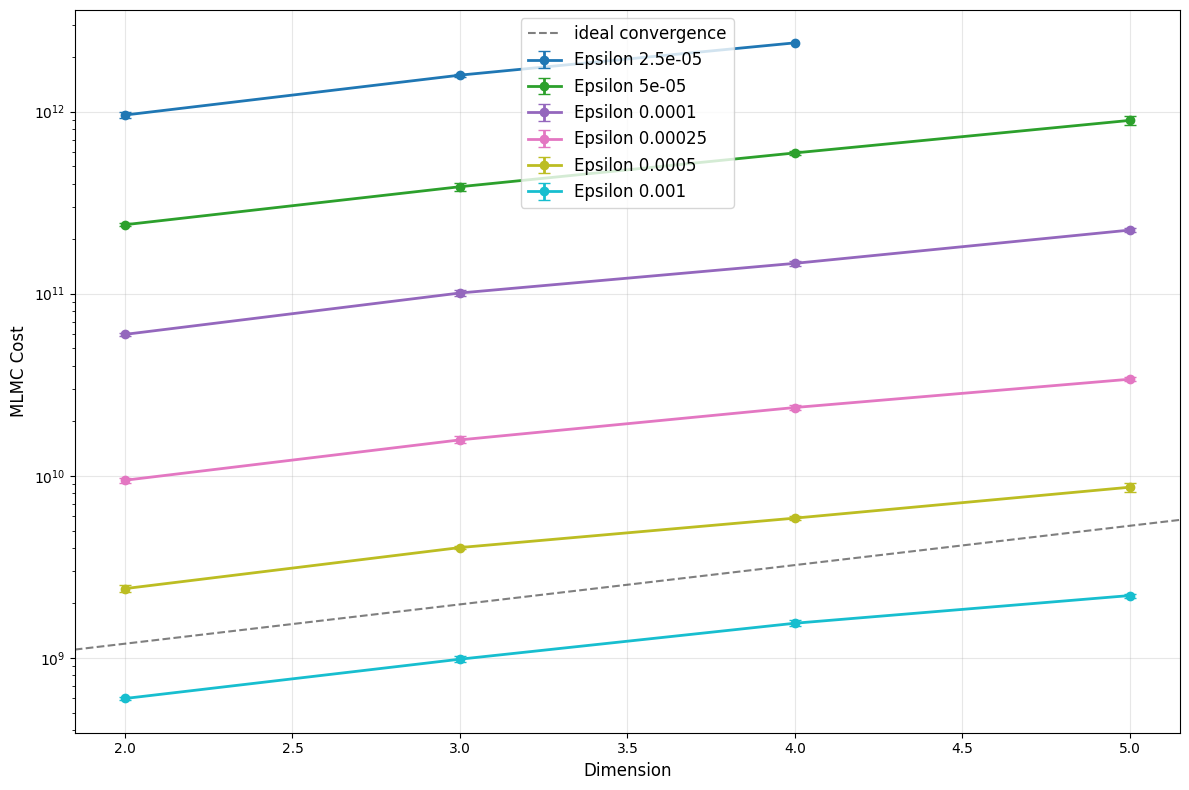

In [50]:
csv_file2 = "../cleanData/mlmc_ratio2_gaussian.csv"
outfile = "../plots/mlmc_ratio2_gaussian_convergence.pdf"
#plot_mlmc_cost_vs_epsilon(csv_file2, True, outfile)
plot_mlmc_cost_vs_dimension(csv_file2, True, "../plots/mlmc_ratio2_gaussian_dim.pdf")

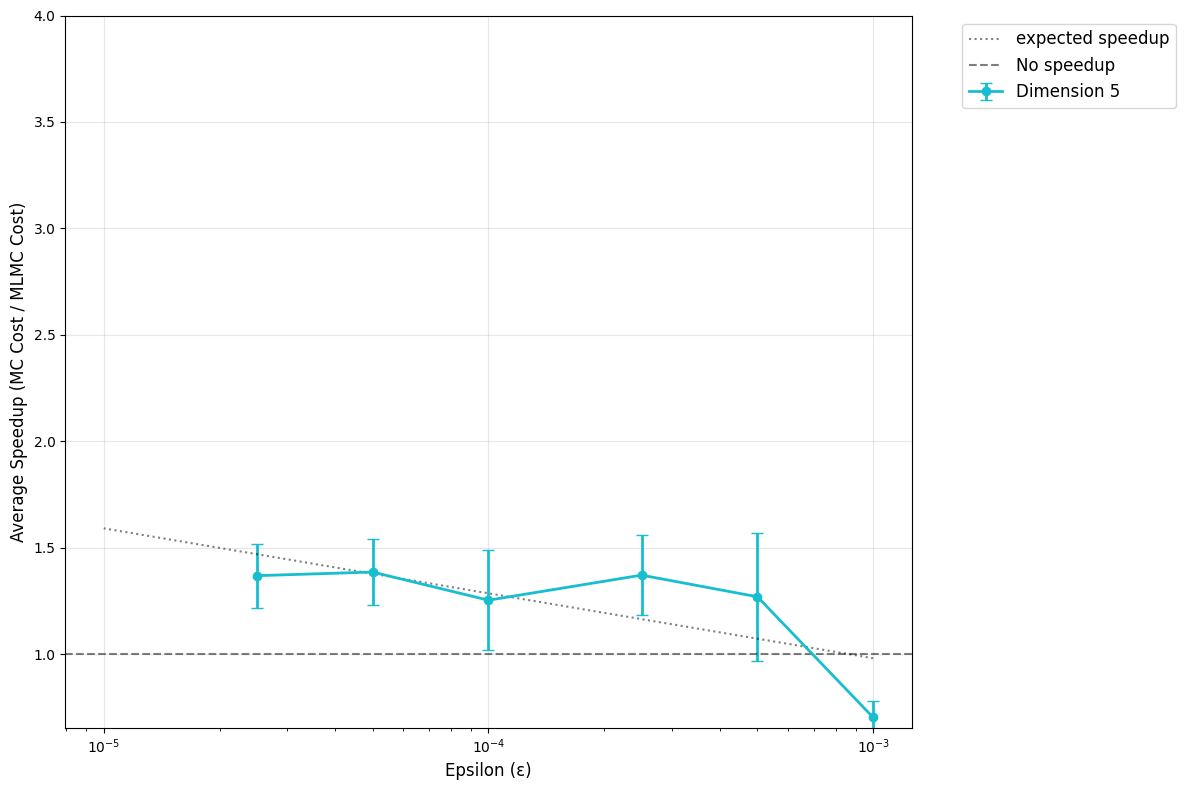


Grouped Speedup Statistics:
Dimension 5:
  Number of epsilon values: 6
  Overall speedup range: 0.70x - 1.39x
  Overall average speedup: 1.23x
  Data points per epsilon: 5 (assuming uniform)



In [19]:
csv_file = "../cleanData/mlmc_ratio2_random.csv"
outfile = "../plots/mlmc_ratio16_random_convergence.pdf"
#plot_mlmc_cost_vs_epsilon(csv_file, True, outfile)
plot_speedup(csv_file,5)

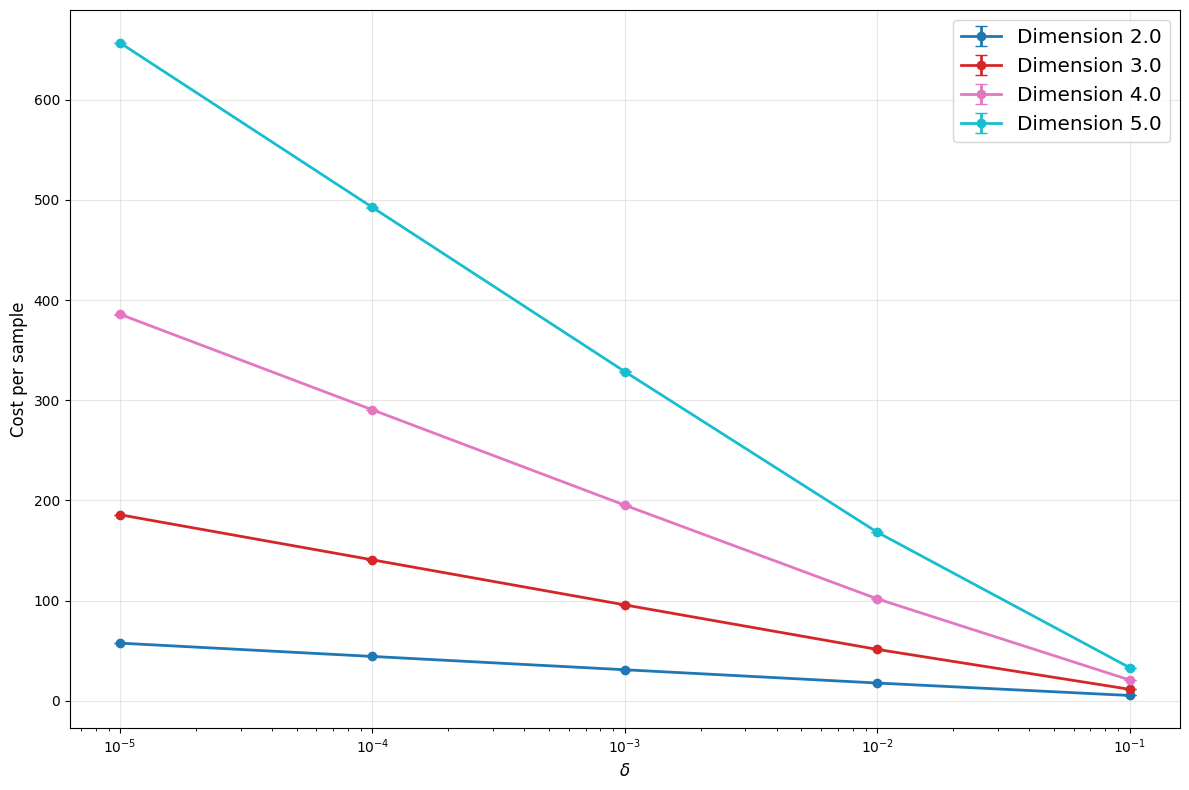

In [13]:
wos_csv_file = "../cleanData/wos_work.csv"
plot_work_vs_delta(wos_csv_file, True, "../plots/wos_work.pdf")